In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ProjectFunctions as pf

In [2]:
def acceleration(index, vectObjPos, objMasses, G = 4*(np.pi**2/333000)):
    pos_WO_Obj = np.delete(vectObjPos, index, axis = 1) #Position of the objects not including the origin object
    pos_Obj = vectObjPos[:,index] #Position of the origin object
    pos_Obj = np.reshape(pos_Obj, (len(pos_Obj),1)) #Reshape of a vector
    
    mass_WO_Obj = np.delete(objMasses, index)
    
    radialDist = np.linalg.norm(pos_Obj-pos_WO_Obj,axis=0)
    
    a = -G*(np.sum(mass_WO_Obj*(pos_Obj-pos_WO_Obj)*(1/np.abs(radialDist)**3),axis=1))

    a = np.reshape(a,np.shape(pos_Obj))
    
    return(a)

In [17]:
G = 6.67408E-11
Gnu = 4*(np.pi**2/333000)
aU = 1.4949E11

# position
posSun = np.array([0,0,0]) #m
posEarth = np.array([7.251E7,1.181E8,5.119E7])*1000/aU #m
posMoon = np.array([7.244E7,1.185E8,5.137E7])*1000/aU #m
posMars = np.array([-1.910E8,-1.294E8,-5.418E7])*1000/aU #m


# velocity
vSun = np.array([0,0,0]) #m/s
vEarth = np.array([-2.6E4,1.3E4,5.76E3])/4744 #m/s
vMoon = np.array([-2.74E4,1.31E4,5.76E3])/4744 #m/s
vMars = np.array([1.524E4,-1.57E4,-7.62E3])/4744 #m/s

# mass
mE = 5.972E24 #kg
mS = 1.989E30/mE #kg
mM = 7.347E22/mE #kg
mMs = 0.642E24/mE
mE /= mE

names = ['Sun', 'Earth', 'Moon', 'Mars']

In [51]:
iterTime = 687
h = 1/365
t = np.arange(0,iterTime,1)

print(iterTime*h)

1.8821917808219177


In [52]:
# position
posArray = np.array([posSun,posEarth,posMoon,posMars]).T

# velocity
vArray = np.array([vSun,vEarth,vMoon,vMars]).T

# mass
massArray = np.array([[mS,mE,mM,mMs]]).T

#acceleration 
accArray = acceleration(0,posArray,massArray)

for i in range(posArray.shape[1]-1):
    accArray = np.hstack((accArray,acceleration(i+1,posArray,massArray)))

In [53]:
nObjects = posArray.shape

v = np.zeros((iterTime,3,nObjects[1]))
r = np.zeros((iterTime,3,nObjects[1]))
a = np.zeros((iterTime,3,nObjects[1]))

v[0] = vArray
r[0] = posArray
a[0] = accArray

In [54]:
for i in range(0,len(t)-1):
    r[i+1] = r[i] + h*v[i] + ((h**2)/2) * (a[i])
    
    accArray = acceleration(0,r[i+1],massArray)

    for k in range(posArray.shape[1]-1):
        accArray = np.hstack((accArray,acceleration(k+1,r[i+1],massArray)))
    
    a[i+1] = accArray
    
    v[i+1] = v[i] + h*a[i] + (h/2) * (a[i+1]-a[i])

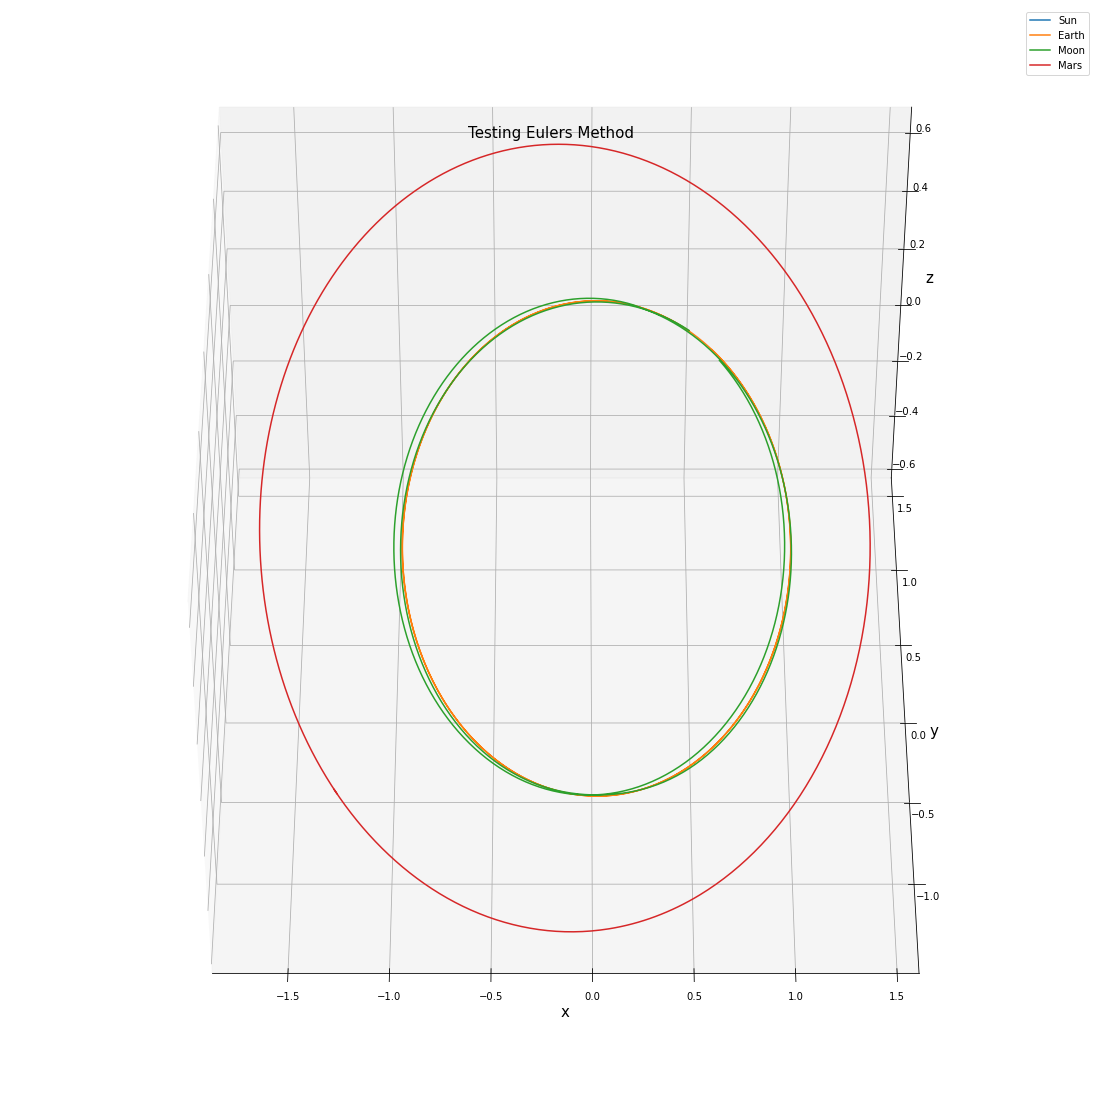

In [55]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

for i in range(r[0].shape[1]):
    xPlot = r[:,0,i]
    yPlot = r[:,1,i]
    zPlot = r[:,2,i]

    ax.plot(xPlot, yPlot, zPlot, label = names[i])

ax.view_init(elev=45, azim=-90) #Change view parameters (spin along the azimuth)

ax.set_xlabel('x', fontsize = 15) #Assign label
ax.set_ylabel('y', fontsize = 15) #Assign label
ax.set_zlabel('z', fontsize = 15) #Assign label

ax.set_title('Testing Eulers Method', y=0.95, fontsize=15)

ax.legend()